This notebook illustrates text clustering. Some visualization techniques are also covered. We will use a COVID tweet dataset.

In [15]:
import pandas as pd
import numpy as np

# load datasets
train_data_file = "./Datasets/Corona_NLP/Tweets_preprocessed_train_data.csv"
test_data_file = "./Datasets/Corona_NLP/Tweets_preprocessed_test_data.csv"

# import train and test datasets into data frames and print out their original lengths
train_data_df = pd.read_csv(train_data_file)
test_data_df = pd.read_csv(test_data_file)
print ("Original train set: ",len(train_data_df))
print ("Original test set: ",len(test_data_df))

# remove rows with null labels
train_data_df = train_data_df[~train_data_df["Sentiment"].isnull()]
test_data_df = test_data_df[~test_data_df["Sentiment"].isnull()]
print ("After removing instances with no labels, train set size: ", len(train_data_df))
print ("After removing instances with no labels, test set size: ", len(test_data_df))

# remove empty rows from both datasets and print out their new lengths
train_data_df = train_data_df[~train_data_df["CleanedTweet"].isnull()]
test_data_df = test_data_df[~test_data_df["CleanedTweet"].isnull()]
print ("After removing empty tweets, train set size: ",len(train_data_df))
print ("After removing empty tweets, test set size: ",len(test_data_df))

# print out top 5 rows of the training set
display(train_data_df.head(5))

Original train set:  40000
Original test set:  4957
After removing instances with no labels, train set size:  39996
After removing instances with no labels, test set size:  4957
After removing empty tweets, train set size:  39996
After removing empty tweets, test set size:  4957


,UserName,ScreenName,Location,TweetAt,OriginalTweet,Sentiment,Hashtags,CleanedTweet,Accounts,TokenizedTweet,StopwordRemovedTweet,StemmedTweet
0,3799,48751,London,16-03-2020,@menyrbie @phil_gahan @chrisitv https://t.co/i...,Neutral,NaN,https t co ifz9fan2pa and https t co xx6ghgfz...,"['menyrbie', 'phil_gahan', 'chrisitv']","['https', 't', 'co', 'ifz9fan2pa', 'and', 'htt...","['https', 'co', 'ifz9fan2pa', 'https', 'co', '...","['http', 't', 'co', 'ifz9fan2pa', 'and', 'http..."
1,3800,48752,UK,16-03-2020,advice talk to your neighbours family to excha...,Positive,NaN,advice talk to your neighbours family to excha...,NaN,"['advice', 'talk', 'to', 'your', 'neighbours',...","['advice', 'talk', 'neighbours', 'family', 'ex...","['advic', 'talk', 'to', 'your', 'neighbour', '..."
2,3801,48753,Vagabonds,16-03-2020,coronavirus australia: woolworths to give elde...,Positive,NaN,coronavirus australia woolworths to give elder...,NaN,"['coronavirus', 'australia', 'woolworths', 'to...","['coronavirus', 'australia', 'woolworths', 'gi...","['coronaviru', 'australia', 'woolworth', 'to',..."
3,3802,48754,NaN,16-03-2020,my food stock is not the only one which is emp...,Positive,"['covid19france', 'covid_19', 'covid19', 'coro...",my food stock is not the only one which is emp...,NaN,"['my', 'food', 'stock', 'is', 'not', 'the', 'o...","['food', 'stock', 'one', 'empty', 'please', 'p...","['my', 'food', 'stock', 'is', 'not', 'the', 'o..."
4,3803,48755,NaN,16-03-2020,"me, ready to go at supermarket during the #cov...",Negative,"['covid19', 'coronavirus', 'coronavirusfrance'...",me ready to go at supermarket during the outbr...,NaN,"['me', 'ready', 'to', 'go', 'at', 'supermarket...","['ready', 'go', 'supermarket', 'outbreak', 'pa...","['me', 'readi', 'to', 'go', 'at', 'supermarket..."


In [16]:
# combine the training and test data for later tasks
frames = [train_data_df, test_data_df]
all_dataset = pd.concat(frames)

## Text Clustering

Text clustering can be helpful when we do not have labels and when our goal is to get a better understanding of the dataset.

In [17]:
# preprocess a subset of data for use (using the entire dataset might be prohibitive in some cases)
subset = all_dataset[0:1000].copy()

# we do want to exclude stopwords for clustering
subset['ProcessedTweet'] = ""
for index, row in subset.iterrows():
    stemmed_words = []
    words = row["StopwordRemovedTweet"] 
    words = words[1:-1].split(',')
    altered_text = ""
    for word in words:
        altered_text = altered_text + " " +word.strip()[1:-1]
    subset.at[index,"ProcessedTweet"] = altered_text

x_text = subset['ProcessedTweet']
display(x_text.head(10))

subset

0     https co ifz9fan2pa https co xx6ghgfzcc https...
1     advice talk neighbours family exchange phone ...
2     coronavirus australia woolworths give elderly...
3     food stock one empty please panic enough food...
4     ready go supermarket outbreak paranoid food s...
5     news region first confirmed covid 19 case cam...
6     cashier grocery store sharing insights prove ...
7     supermarket today buy toilet paper https co e...
8     due covid 19 retail store classroom atlanta o...
9     corona prevention stop buy things cash use on...
Name: ProcessedTweet, dtype: object

,UserName,ScreenName,Location,TweetAt,OriginalTweet,Sentiment,Hashtags,CleanedTweet,Accounts,TokenizedTweet,StopwordRemovedTweet,StemmedTweet,ProcessedTweet
0,3799,48751,London,16-03-2020,@menyrbie @phil_gahan @chrisitv https://t.co/i...,Neutral,NaN,https t co ifz9fan2pa and https t co xx6ghgfz...,"['menyrbie', 'phil_gahan', 'chrisitv']","['https', 't', 'co', 'ifz9fan2pa', 'and', 'htt...","['https', 'co', 'ifz9fan2pa', 'https', 'co', '...","['http', 't', 'co', 'ifz9fan2pa', 'and', 'http...",https co ifz9fan2pa https co xx6ghgfzcc https...
1,3800,48752,UK,16-03-2020,advice talk to your neighbours family to excha...,Positive,NaN,advice talk to your neighbours family to excha...,NaN,"['advice', 'talk', 'to', 'your', 'neighbours',...","['advice', 'talk', 'neighbours', 'family', 'ex...","['advic', 'talk', 'to', 'your', 'neighbour', '...",advice talk neighbours family exchange phone ...
2,3801,48753,Vagabonds,16-03-2020,coronavirus australia: woolworths to give elde...,Positive,NaN,coronavirus australia woolworths to give elder...,NaN,"['coronavirus', 'australia', 'woolworths', 'to...","['coronavirus', 'australia', 'woolworths', 'gi...","['coronaviru', 'australia', 'woolworth', 'to',...",coronavirus australia woolworths give elderly...
3,3802,48754,NaN,16-03-2020,my food stock is not the only one which is emp...,Positive,"['covid19france', 'covid_19', 'covid19', 'coro...",my food stock is not the only one which is emp...,NaN,"['my', 'food', 'stock', 'is', 'not', 'the', 'o...","['food', 'stock', 'one', 'empty', 'please', 'p...","['my', 'food', 'stock', 'is', 'not', 'the', 'o...",food stock one empty please panic enough food...
4,3803,48755,NaN,16-03-2020,"me, ready to go at supermarket during the #cov...",Negative,"['covid19', 'coronavirus', 'coronavirusfrance'...",me ready to go at supermarket during the outbr...,NaN,"['me', 'ready', 'to', 'go', 'at', 'supermarket...","['ready', 'go', 'supermarket', 'outbreak', 'pa...","['me', 'readi', 'to', 'go', 'at', 'supermarket...",ready go supermarket outbreak paranoid food s...
...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,4794,49746,"Washington, DC",17-03-2020,connectivity is essential during times of cris...,Negative,NaN,connectivity is essential during times of cris...,['cwaunion'],"['connectivity', 'is', 'essential', 'during', ...","['connectivity', 'essential', 'times', 'crisis...","['connect', 'is', 'essenti', 'dure', 'time', '...",connectivity essential times crisis amp allie...
996,4795,49747,"San Francisco, CA",17-03-2020,@standwithprager wells fargo is committed to h...,Positive,NaN,wells fargo is committed to helping customers...,['standwithprager'],"['wells', 'fargo', 'is', 'committed', 'to', 'h...","['wells', 'fargo', 'committed', 'helping', 'cu...","['well', 'fargo', 'is', 'commit', 'to', 'help'...",wells fargo committed helping customers exper...
997,4796,49748,"San Francisco, CA",17-03-2020,@karileeak907 wells fargo is committed to help...,Positive,NaN,wells fargo is committed to helping customers...,['karileeak907'],"['wells', 'fargo', 'is', 'committed', 'to', 'h...","['wells', 'fargo', 'committed', 'helping', 'cu...","['well', 'fargo', 'is', 'commit', 'to', 'help'...",wells fargo committed helping customers exper...
998,4797,49749,"San Francisco, CA",17-03-2020,@theindigoauthor wells fargo is committed to h...,Positive,NaN,wells fargo is committed to helping customers...,['theindigoauthor'],"['wells', 'fargo', 'is', 'committed', 'to', 'h...","['wells', 'fargo', 'committed', 'helping', 'cu...","['well', 'fargo', 'is', 'commit', 'to', 'help'...",wells fargo committed helping customers exper...


In [18]:
from sklearn.feature_extraction.text import CountVectorizer


vectorizer = CountVectorizer(ngram_range = (1,1))

vectorizer.fit(x_text)

X = vectorizer.transform(x_text)

final_df = pd.DataFrame(data = X.toarray(), columns=vectorizer.get_feature_names())
final_df.head()

,00,000,02ddkwsnxo,0508,0645,0712128888,0c35u3vqed,0cp388qkv6,0cscqx1nz5,0cv0793ols,...,zqgw9zsqzx,zqu0sh8jkb,zr67d1u12q,zrlg0z520j,zs6npef9vz,ztn3imkgpd,zuppardo,zwoferink,zxghde3rtx,zxlb0ncnom
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


### K-Means Clustering

K-Means clustering partitions data points into k clusters, where each observation belongs to the cluster with the nearest mean (cluster centers or cluster centroids). Keywords can be extracted from clusters to get an intuitive sense of what the clusters are about. 

In [19]:
from sklearn.cluster import KMeans
import numpy as np
import matplotlib.pyplot as plt

# create 3 clusters
k=3
kmeans = KMeans(n_clusters=k).fit(final_df)

# the label of the cluster that each instance was assigned to 
labels = kmeans.predict(final_df)

# find center/centroid of clusters 
centers = kmeans.cluster_centers_

### Visualizing clusters
We will use a simple histogram to observe the most dominant words in each cluster (visualization code from https://nbviewer.org/github/LucasTurtle/national-anthems-clustering/blob/master/Cluster_Anthems.ipynb). Experiment with different K values and find the best one.

In [20]:
pip install seaborn

Note: you may need to restart the kernel to use updated packages.


In [25]:
import seaborn as sns
from wordcloud import WordCloud

def get_top_features_cluster(tf_idf_array, prediction, n_feats):
    labels = np.unique(prediction)
    dfs = []
    for label in labels:
        id_temp = np.where(prediction==label) # indices for each cluster
        x_means = np.mean(tf_idf_array[id_temp], axis = 0) # returns average score across cluster
        sorted_means = np.argsort(x_means)[::-1][:n_feats] # indices with top 20 scores
        features = vectorizer.get_feature_names()
        best_features = [(features[i], x_means[i]) for i in sorted_means]
        df = pd.DataFrame(best_features, columns = ['features', 'score'])
        dfs.append(df)
    return dfs

def plotWords(dfs, n_feats):
    plt.figure(figsize=(8, 4))
    for i in range(0, len(dfs)):
        plt.title(("Most Common Words in Cluster {}".format(i)), fontsize=10, fontweight='bold')
        sns.barplot(x = 'score' , y = 'features', orient = 'h' , data = dfs[i][:n_feats])
        plt.show()

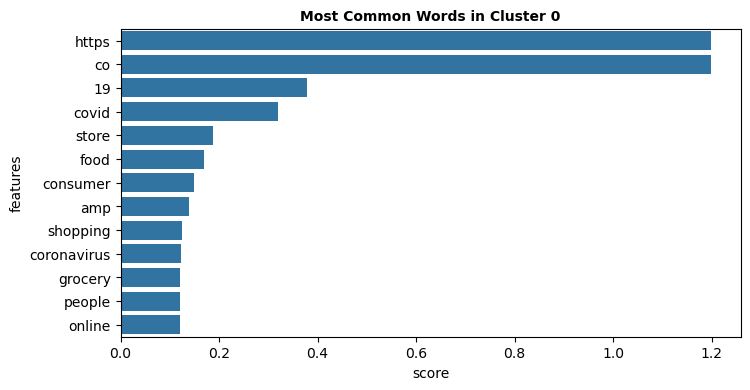

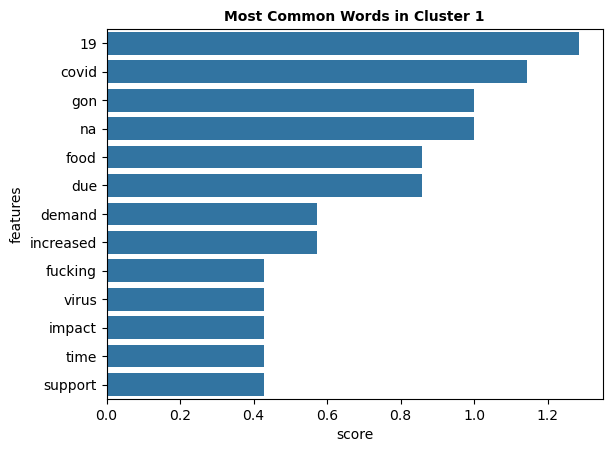

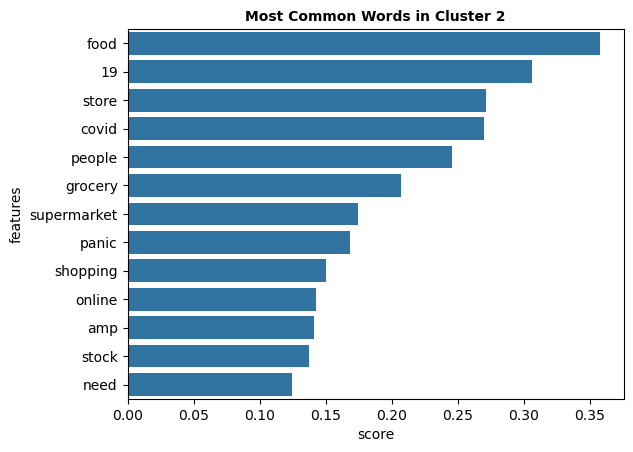

In [26]:
final_df_array = final_df.to_numpy()
prediction = kmeans.predict(final_df)
n_feats = 20
dfs = get_top_features_cluster(final_df_array, prediction, n_feats)
plotWords(dfs, 13)

What do you observe in the plots above?

### Wordclouds

Now that we have generated graphs above and observed the most common words in each cluster, we can also generate word clouds from the clusters.

In [27]:
# transform a centroids dataframe into a dictionary to be used for a WordCloud
def centroidsDict(centroids, index):
    a = centroids.T[index].sort_values(ascending = False).reset_index().values
    centroid_dict = dict()

    for i in range(0, len(a)):
        centroid_dict.update( {a[i,0] : a[i,1]} )

    return centroid_dict

def generateWordClouds(centroids):
    wordcloud = WordCloud(max_font_size=100, background_color = 'white')
    for i in range(0, len(centroids)):
        centroid_dict = centroidsDict(centroids, i)        
        wordcloud.generate_from_frequencies(centroid_dict)

        plt.figure()
        plt.title('Cluster {}'.format(i))
        plt.imshow(wordcloud)
        plt.axis("off")
        plt.show()

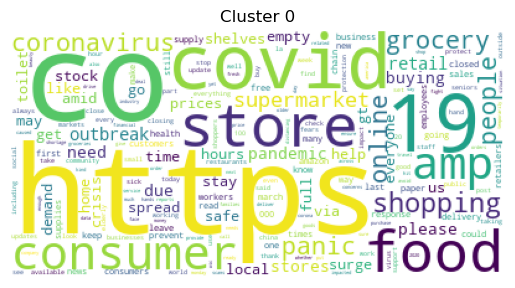

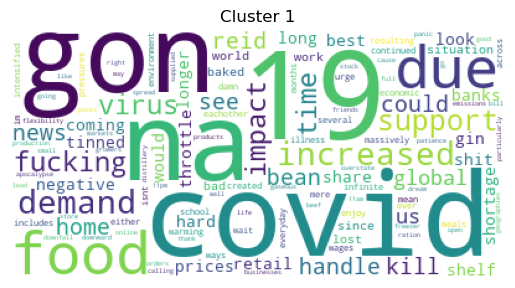

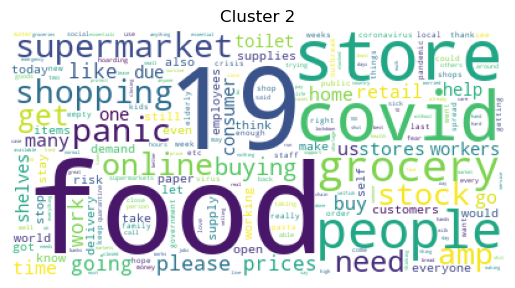

In [28]:
centroids = pd.DataFrame(kmeans.cluster_centers_)
centroids.columns = final_df.columns
generateWordClouds(centroids)

In order to observe the clusters graphically and more intuitively, we are going to use PCA to reduce the dimensionality of our feature matrix, generating a two-dimension plot.

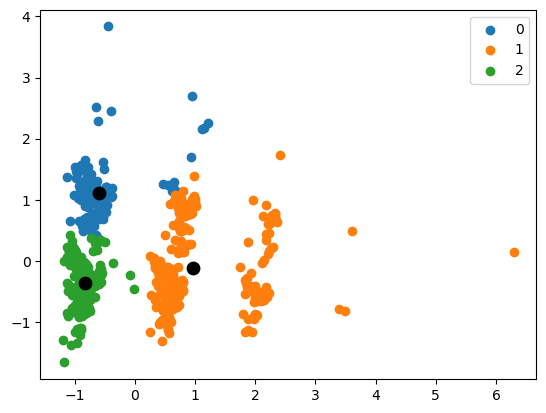

In [29]:
from sklearn.decomposition import PCA
pca = PCA(2)
 
# transform the data
df = pca.fit_transform(final_df)
 
df.shape

kmeans = KMeans(n_clusters= k)
 
# predict the labels of clusters
label = kmeans.fit_predict(df)

u_labels = np.unique(label)
centroids = kmeans.cluster_centers_

# plot the results 
for i in u_labels:
    plt.scatter(df[label == i , 0] , df[label == i , 1] , label = i)

plt.scatter(centroids[:,0] , centroids[:,1] , s = 80, color = 'k')
plt.legend()
plt.show()

Dimensionality reduction helps you see the clusters more clearly. In our case, clusters are not too distinct (i.e., there are some overlapping words between clusters), since most of the tweets are about the panic in early days of COVID-19. Making the text representations better (better cleaning, better weighting, etc.) could lead to better clusters. You can also experiment with different k values. 

We can calculate Silhouette score for the clusters as well. See the details on how to do this: https://scikit-learn.org/stable/auto_examples/cluster/plot_kmeans_silhouette_analysis.html. 